In [11]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import src.support_functions as sf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [12]:
# Load dataset and display basic information

data = pd.read_csv("../data/CHURN_FEATURES.csv")
print(f"\n📊 INFORMACIÓN GENERAL DEL DATASET:")
print(f"   • Forma del dataset: {data.shape}")
print(f"   • Número de variables: {data.shape[1] - 1}")
print(f"   • Número de observaciones: {data.shape[0]}")

print(f"\n📋 PRIMERAS 5 FILAS:")
print(data.head())

print(f"\n🔍 TIPOS DE DATOS:")
print(data.dtypes.value_counts())

print(f"\n📈 INFORMACIÓN DETALLADA:")
data.info()

print(f"\n❌ DATOS FALTANTES:")
missing_data = data.isnull().sum()
print(f"   • Total de valores faltantes: {missing_data.sum()}")
if missing_data.sum() > 0:
    print(missing_data[missing_data > 0])
else:
    print("   • No hay valores faltantes en el dataset ✅")

print(f"\n📊 ESTADÍSTICAS DESCRIPTIVAS:")
print(data.describe())



📊 INFORMACIÓN GENERAL DEL DATASET:
   • Forma del dataset: (17104, 32)
   • Número de variables: 31
   • Número de observaciones: 17104

📋 PRIMERAS 5 FILAS:
   ID_VENDEDOR  ID_CAMPANA  NUMERO_CAMPANA  ANIO  MES  ES_INICIO_ANIO  \
0     19727236       21101              68  2021    1               1   
1     19737143       21101              68  2021    1               1   
2     19737119       21101              68  2021    1               1   
3     19732988       21101              68  2021    1               1   
4     19724095       21101              68  2021    1               1   

   ES_NAVIDAD  TARGET_CHURN  ID_VENDEDOR.1  ID_CAMPANA.1  ...  ID_CAMPANA.3  \
0           0             0       19727236         21101  ...         21101   
1           0             1       19737143         21101  ...         21101   
2           0             0       19737119         21101  ...         21101   
3           0             0       19732988         21101  ...         21101   
4       

In [13]:
data = data.drop(columns=[
    'ID_VENDEDOR',
    'ID_CAMPANA',
    'ID_VENDEDOR.1',
    'ID_CAMPANA.1',
    'ID_VENDEDOR.2',
    'ID_CAMPANA.2',
    'ID_UBICACION',
    'ID_VENDEDOR.3',
    'ID_CAMPANA.3',
    'ID_VENDEDOR.4',
    'ID_CAMPANA.4',
    'ID_VENDEDOR.5',
    'ID_CAMPANA.5',
    'NUMERO_CAMPANA',
    'NUMERO_CAMPANA.1',
    'PROVINCIA',
    'DISTRITO',
    'ANIO'
])

data.drop(columns=['EDAD_VENDEDORA'], inplace=True, axis=1)
data['ANTIGUEDAD_MESES'] = data['ANTIGUEDAD_MESES'].clip(lower=0)
data.dropna(inplace=True)

In [14]:
data.columns

Index(['MES', 'ES_INICIO_ANIO', 'ES_NAVIDAD', 'TARGET_CHURN', 'TIPO_VENDEDOR',
       'SEXO', 'ES_NUEVA', 'ANTIGUEDAD_MESES', 'DEPARTAMENTO', 'MONTO_ACTUAL',
       'MONTO_ANTERIOR', 'NUM_CAMPANAS_HISTORICAS',
       'CAMPANAS_CONSECUTIVAS_PREVIAS'],
      dtype='object')


🎯 ANÁLISIS DE LA VARIABLE OBJETIVO:
   • Clase 0 (No abandono): 7656 (44.9%)
   • Clase 1 (Abandono): 9404 (55.1%)


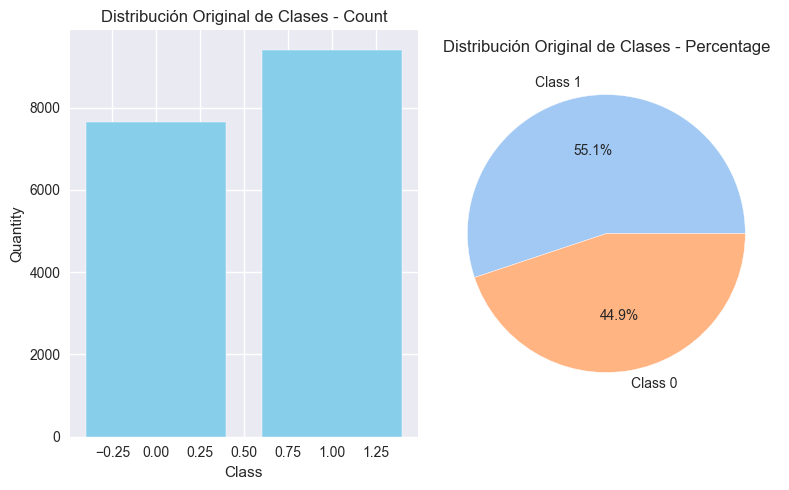

In [15]:
print(f"\n🎯 ANÁLISIS DE LA VARIABLE OBJETIVO:")
target_distribution = data['TARGET_CHURN'].value_counts()
print(f"   • Clase 0 (No abandono): {target_distribution[0]} ({target_distribution[0]/len(data)*100:.1f}%)")
print(f"   • Clase 1 (Abandono): {target_distribution[1]} ({target_distribution[1]/len(data)*100:.1f}%)")

sf.plot_class_balance(data['TARGET_CHURN'], "Distribución Original de Clases")




📈 ANÁLISIS DE DISTRIBUCIONES:


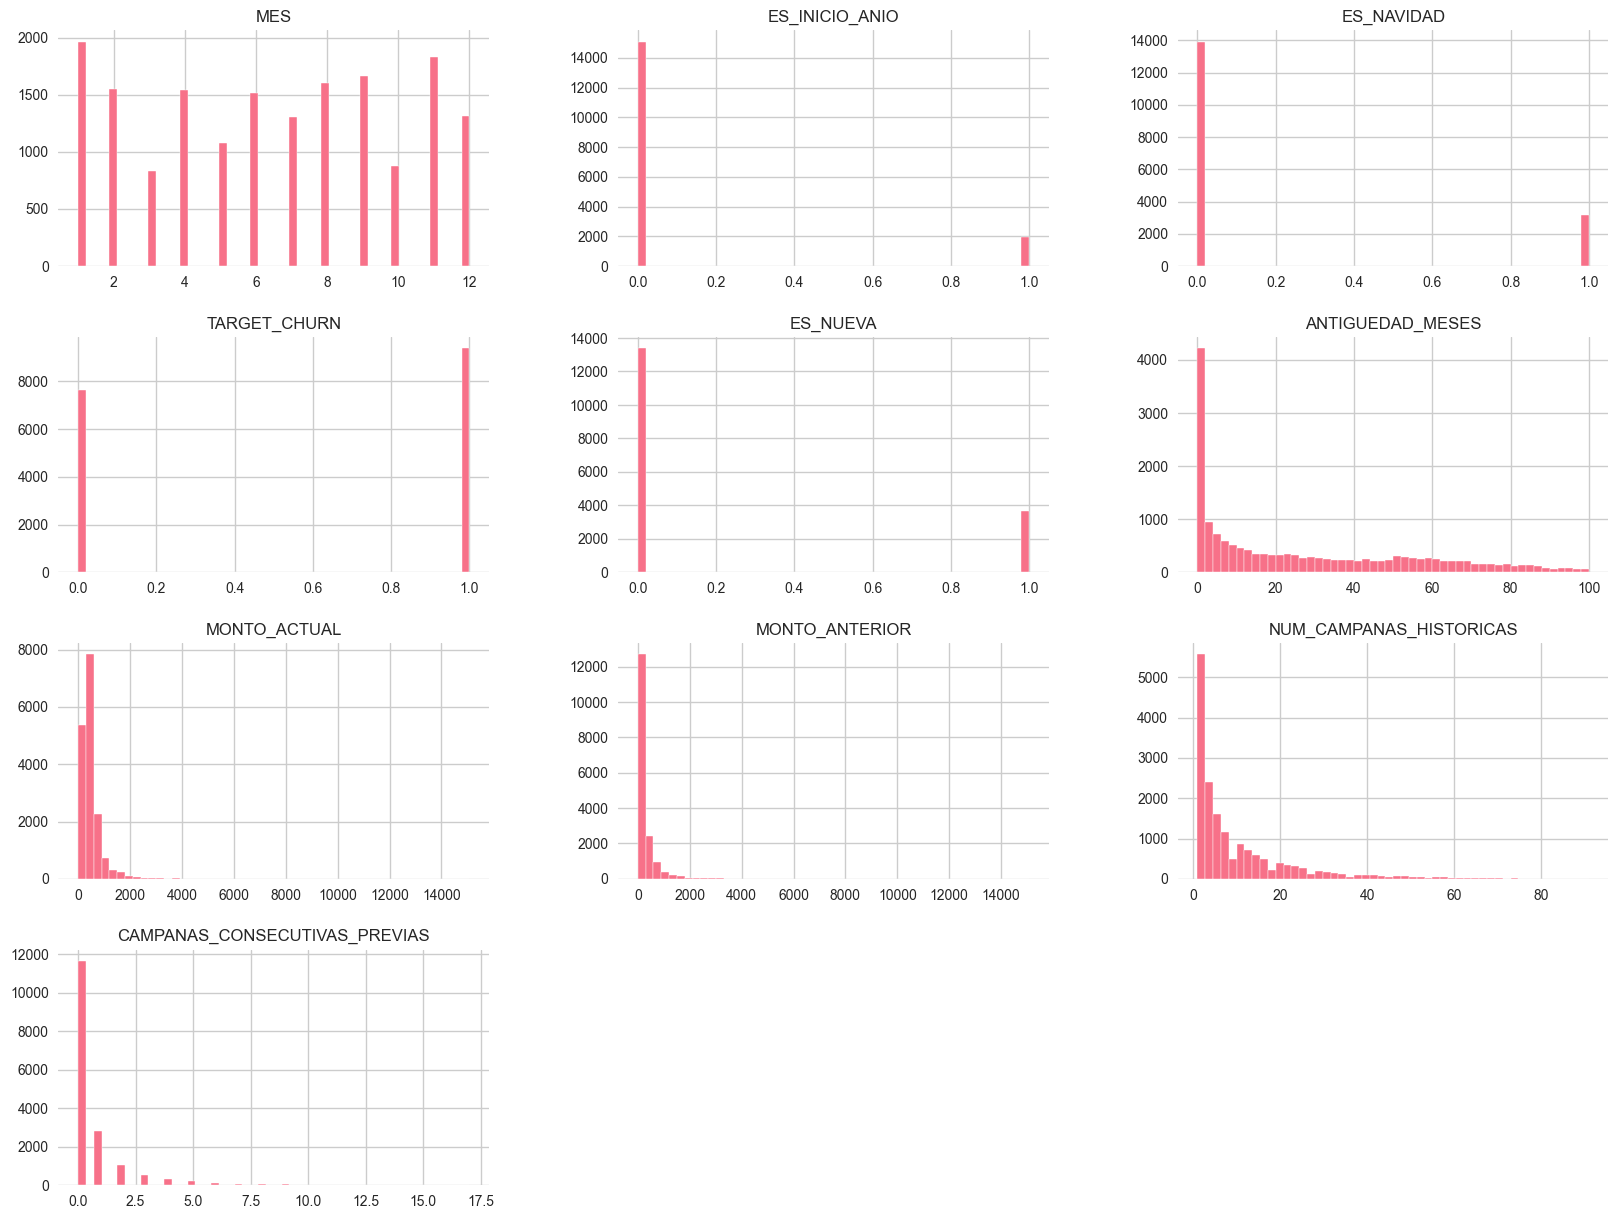

In [16]:
print(f"\n📈 ANÁLISIS DE DISTRIBUCIONES:")

data.hist(bins=50, figsize=(20, 15))
plt.show()

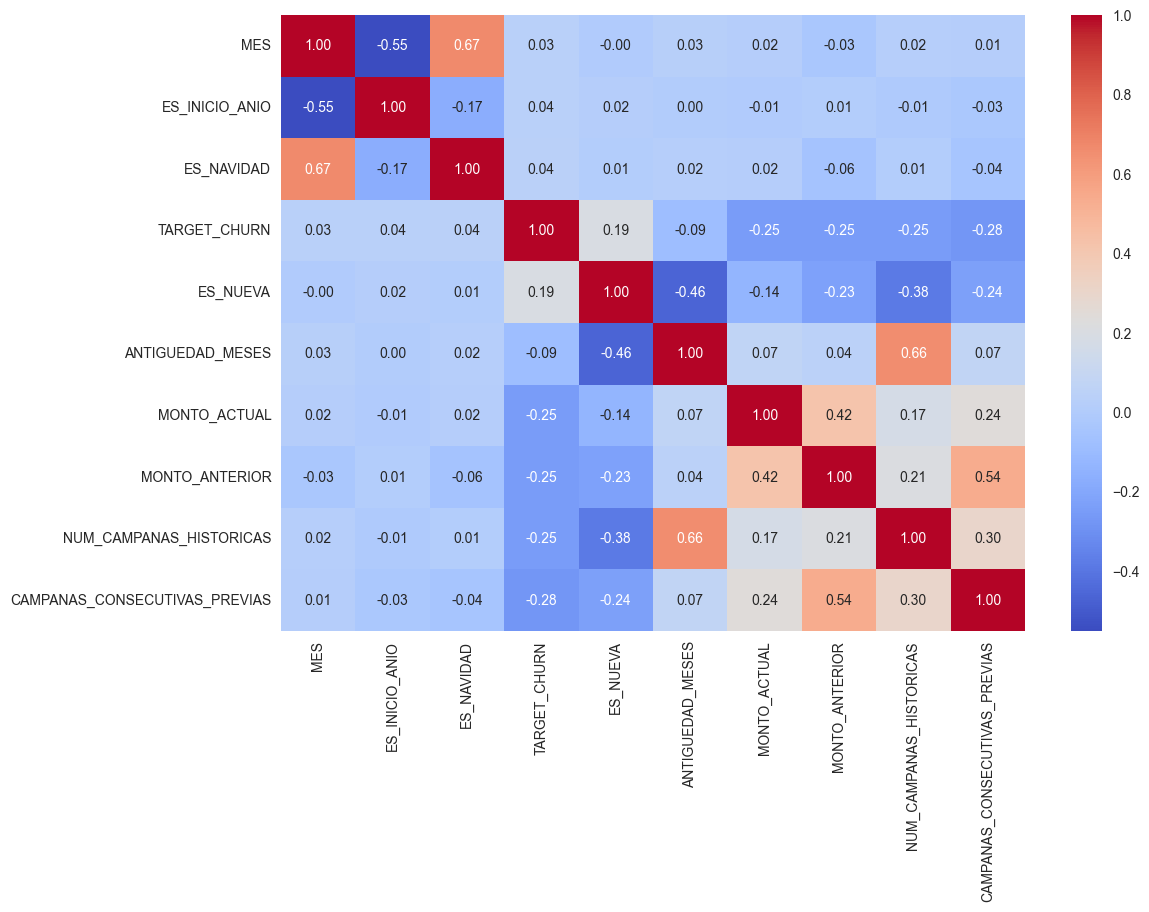

In [17]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


⚠️  ANÁLISIS DE OUTLIERS:


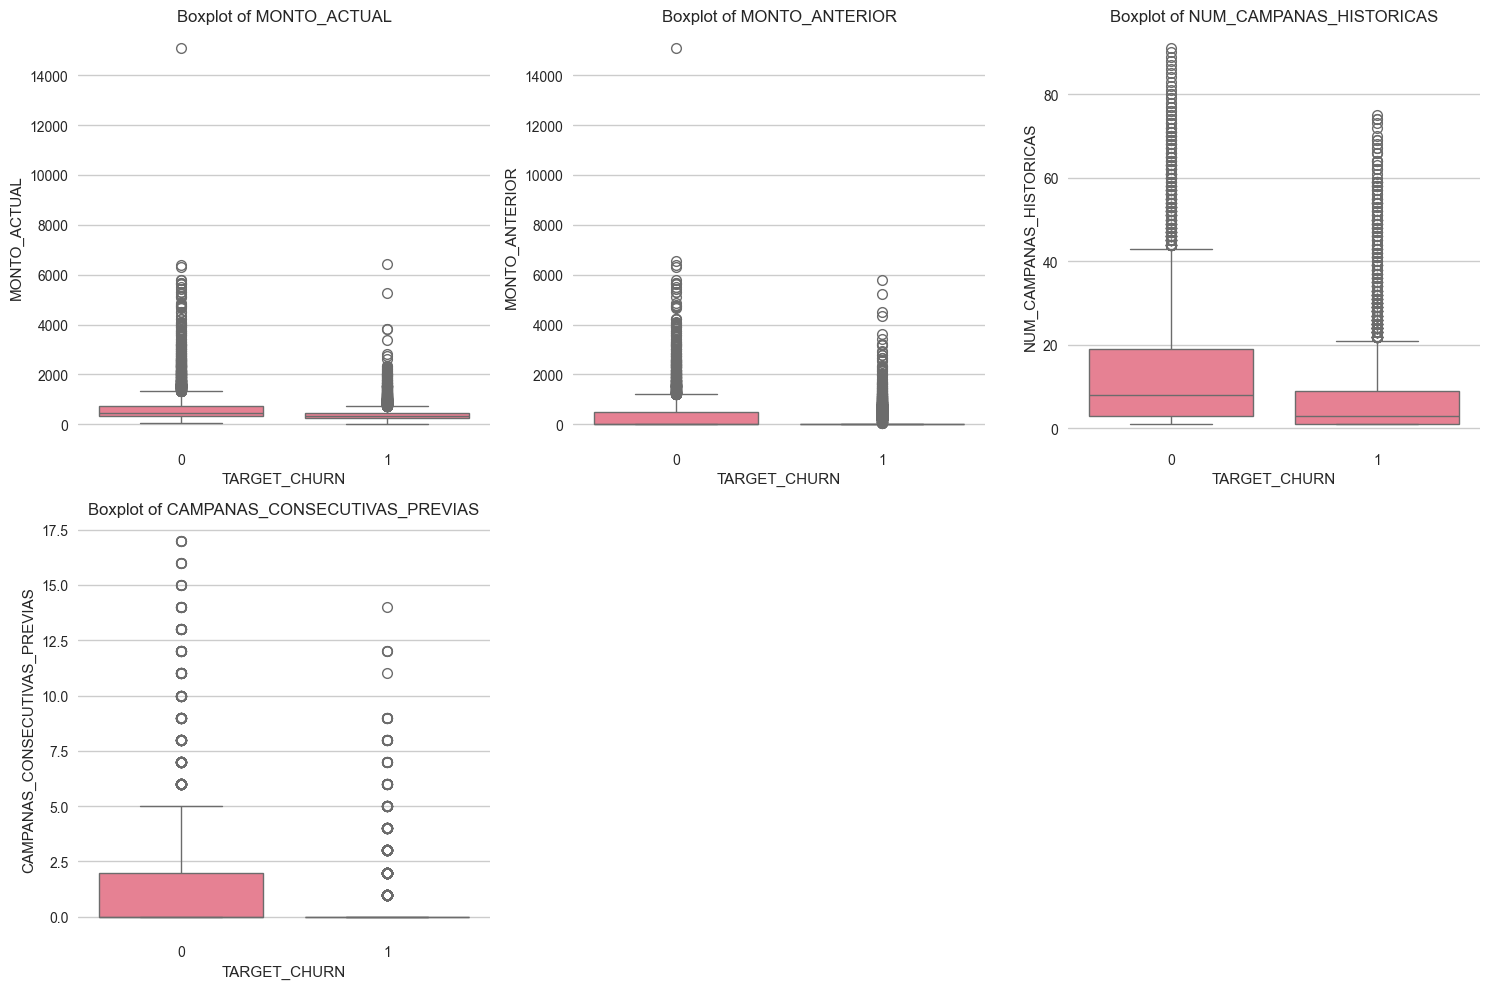


📊 CONTEO DE OUTLIERS POR VARIABLE (método IQR):
   • MONTO_ACTUAL             : 1326 outliers
   • MONTO_ANTERIOR           : 1309 outliers
   • NUM_CAMPANAS_HISTORICAS  : 1364 outliers
   • CAMPANAS_CONSECUTIVAS_PREVIAS: 1515 outliers


In [18]:
print(f"\n⚠️  ANÁLISIS DE OUTLIERS:")

main_features = ['MONTO_ACTUAL', 'MONTO_ANTERIOR',
       'NUM_CAMPANAS_HISTORICAS', 'CAMPANAS_CONSECUTIVAS_PREVIAS']

sf.plot_outliers(data, main_features, target_col='TARGET_CHURN', figsize=(15, 10))

outliers_info = sf.detect_outliers_iqr(data, main_features)
print(f"\n📊 CONTEO DE OUTLIERS POR VARIABLE (método IQR):")
for feature, count in outliers_info.items():
    print(f"   • {feature:<25}: {count:3d} outliers")
